[*********************100%%**********************]  1 of 1 completed


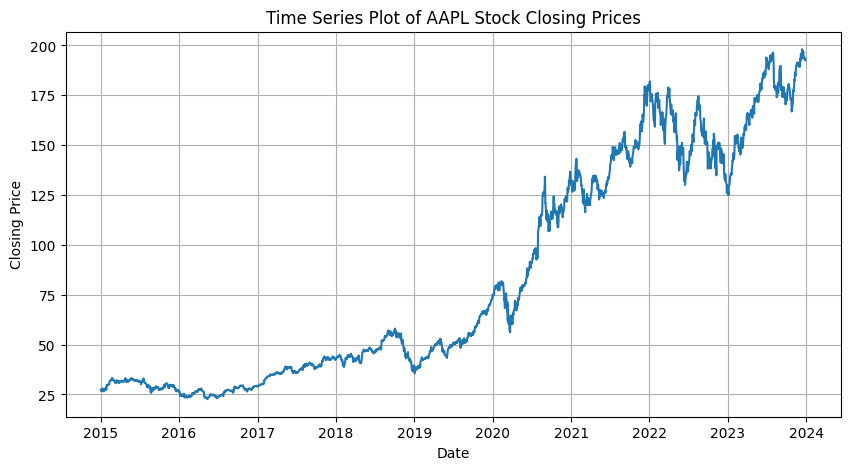

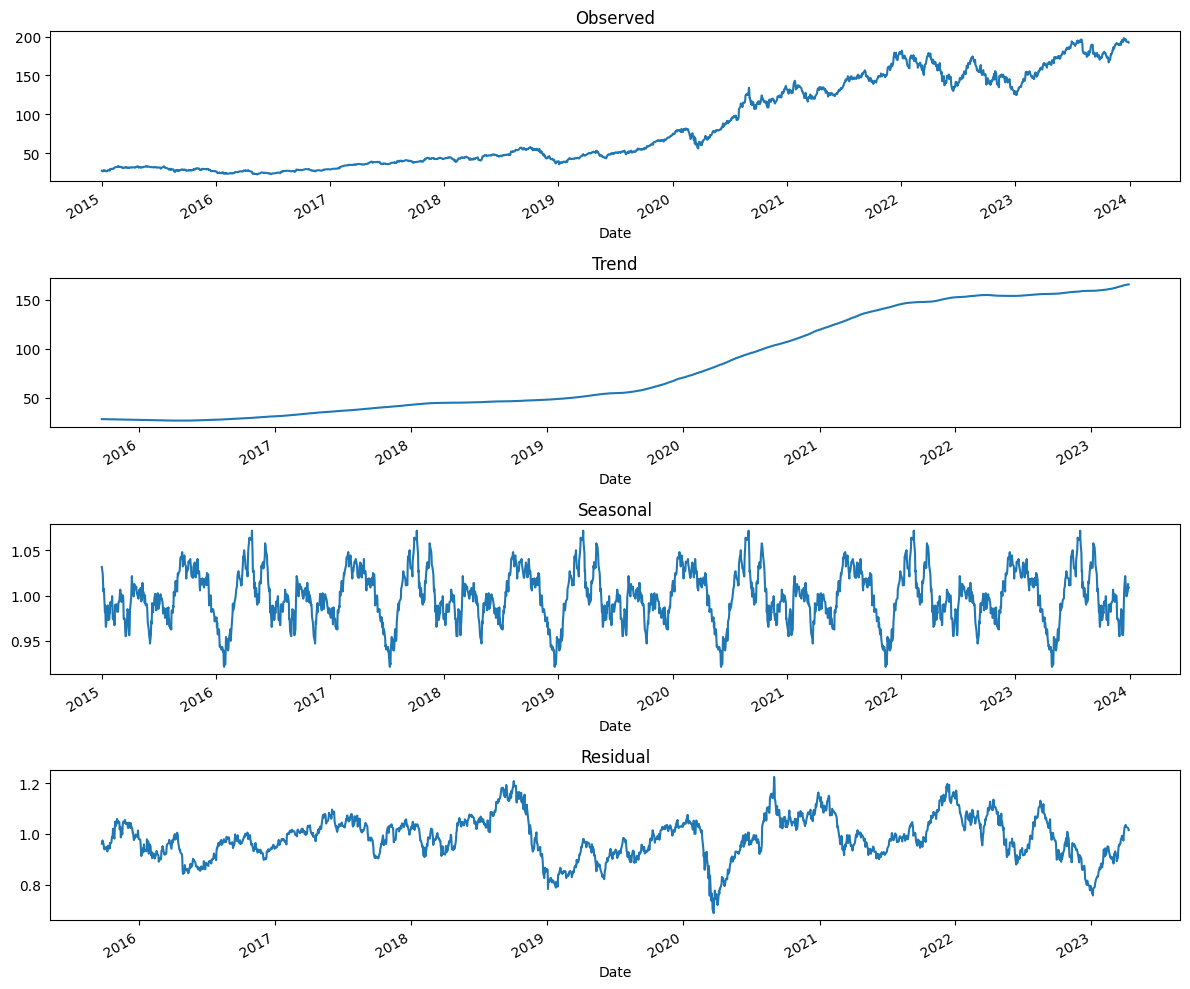

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose

# Fetching data using yfinance
ticker = 'AAPL'  # Replace with the appropriate ticker symbol
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

# Ensure there are enough data points for seasonal decomposition
if len(data) < 730:
    raise ValueError(f"Not enough data points. Need at least 730, but got {len(data)}")

# Setting the index to 'Date'
data.index = pd.to_datetime(data.index)

# Plotting the closing prices
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], linestyle='-')
plt.title(f'Time Series Plot of {ticker} Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Performing seasonal decomposition
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()



[*********************100%%**********************]  1 of 1 completed
/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


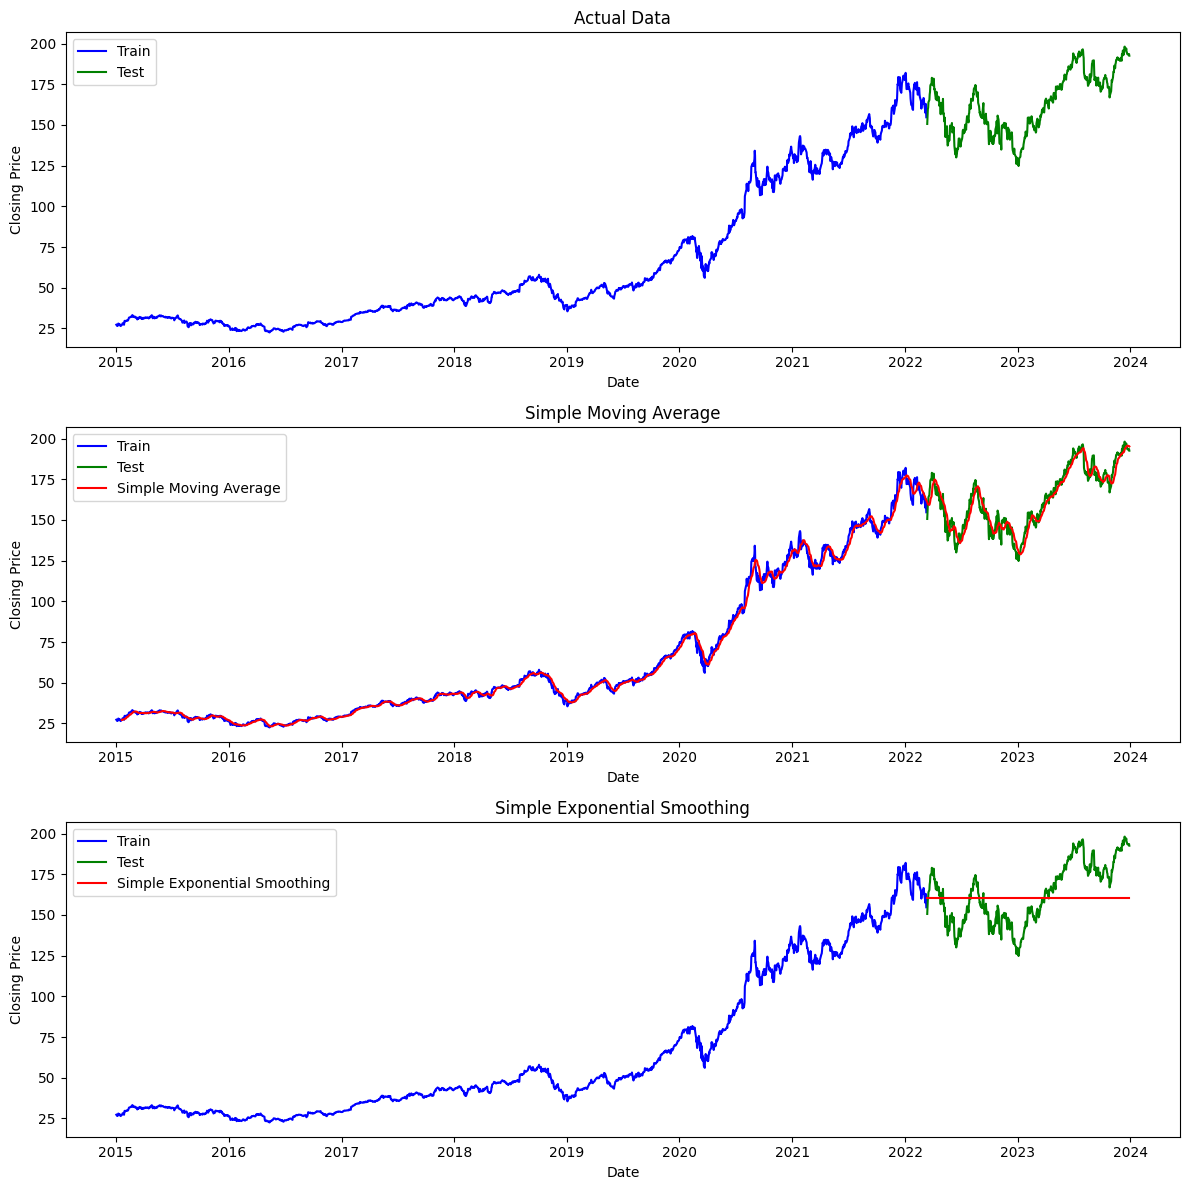

/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/deadsoul/.local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


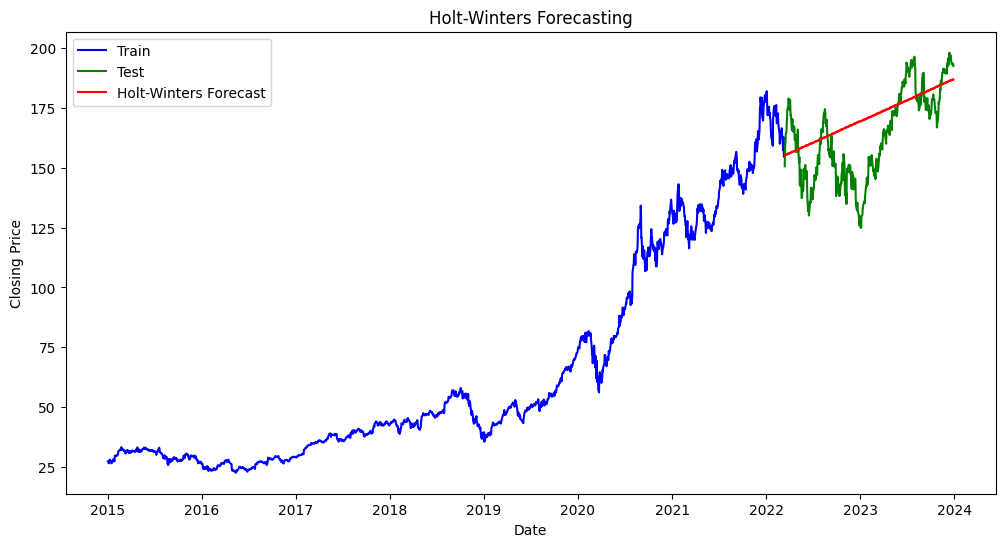

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
import yfinance as yf

# Fetching data using yfinance
ticker = 'AAPL'  # Replace with the appropriate ticker symbol
data1 = yf.download(ticker, start='2015-01-01', end='2023-12-31')

# Splitting data into training and test sets
train_size = int(len(data1) * 0.8)
train, test = data1.iloc[:train_size], data1.iloc[train_size:]

# Plotting the actual data
plt.figure(figsize=(12, 12))
plt.subplot(3, 1, 1)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.title('Actual Data')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Simple Moving Average
window_size = 12
data1['SMA'] = data1['Close'].rolling(window=window_size).mean()
plt.subplot(3, 1, 2)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(data1.index, data1['SMA'], label='Simple Moving Average', color='red')
plt.title('Simple Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Simple Exponential Smoothing
alpha = 0.2
model = SimpleExpSmoothing(train['Close']).fit(smoothing_level=alpha, optimized=False)
forecast_ses = model.forecast(len(test))
plt.subplot(3, 1, 3)
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(test.index, forecast_ses, label='Simple Exponential Smoothing', color='red')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.tight_layout()
plt.show()

# Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=12).fit()
forecast_hw = model.forecast(len(test))
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Test', color='green')
plt.plot(test.index, forecast_hw, label='Holt-Winters Forecast', color='red')
plt.title('Holt-Winters Forecasting')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


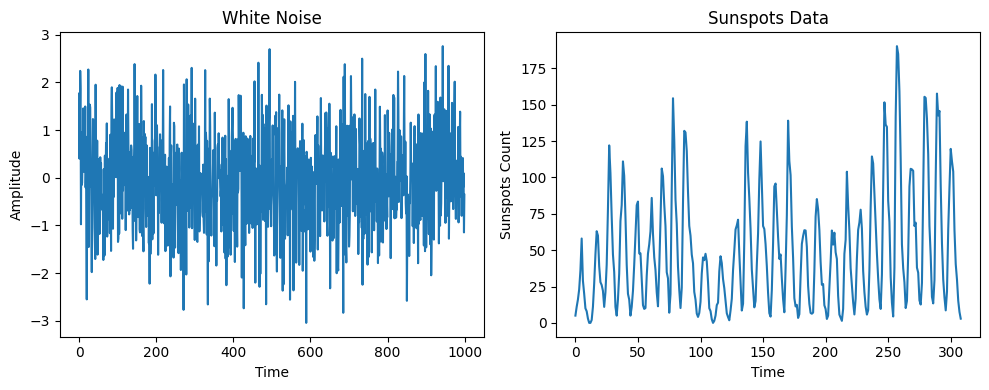

Augmented Dickey-Fuller Test for Sunspots Data:
ADF Statistic: -2.837780724938198
p-value: 0.05307642172812019

Kwiatkowski–Phillips–Schmidt–Shin test for Sunspots Data:
KPSS Statistic: 0.6698662984667937
p-value: 0.01628488195756421

Augmented Dickey-Fuller Test for White Noise:
ADF Statistic: -32.46255933768997
p-value: 0.0

Kwiatkowski–Phillips–Schmidt–Shin test for White Noise:
KPSS Statistic: 0.23806270020371642
p-value: 0.1


/tmp/ipykernel_29256/3703315226.py:34: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result_white_noise = sm.tsa.stattools.kpss(white_noise)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed(0)
white_noise = np.random.normal(0, 1, 1000)
sunspots_data = sm.datasets.sunspots.load_pandas().data
sunspots = sunspots_data["SUNACTIVITY"]
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(white_noise)
plt.title('White Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(1, 2, 2)
plt.plot(sunspots)
plt.title('Sunspots Data')
plt.xlabel('Time')
plt.ylabel('Sunspots Count')
plt.tight_layout()
plt.show()
print("Augmented Dickey-Fuller Test for Sunspots Data:")
adf_result_sunspots = sm.tsa.stattools.adfuller(sunspots)
print(f"ADF Statistic: {adf_result_sunspots[0]}")
print(f"p-value: {adf_result_sunspots[1]}")
print("\nKwiatkowski–Phillips–Schmidt–Shin test for Sunspots Data:")
kpss_result_sunspots = sm.tsa.stattools.kpss(sunspots)
print(f"KPSS Statistic: {kpss_result_sunspots[0]}")
print(f"p-value: {kpss_result_sunspots[1]}")
print("\nAugmented Dickey-Fuller Test for White Noise:")
adf_result_white_noise = sm.tsa.stattools.adfuller(white_noise)
print(f"ADF Statistic: {adf_result_white_noise[0]}")
print(f"p-value: {adf_result_white_noise[1]}")
print("\nKwiatkowski–Phillips–Schmidt–Shin test for White Noise:")
kpss_result_white_noise = sm.tsa.stattools.kpss(white_noise)
print(f"KPSS Statistic: {kpss_result_white_noise[0]}")
print(f"p-value: {kpss_result_white_noise[1]}")



Mean Absolute Error (MAE): 30.3803
Mean Squared Error (MSE): 1577.3521
Root Mean Squared Error (RMSE): 39.7159


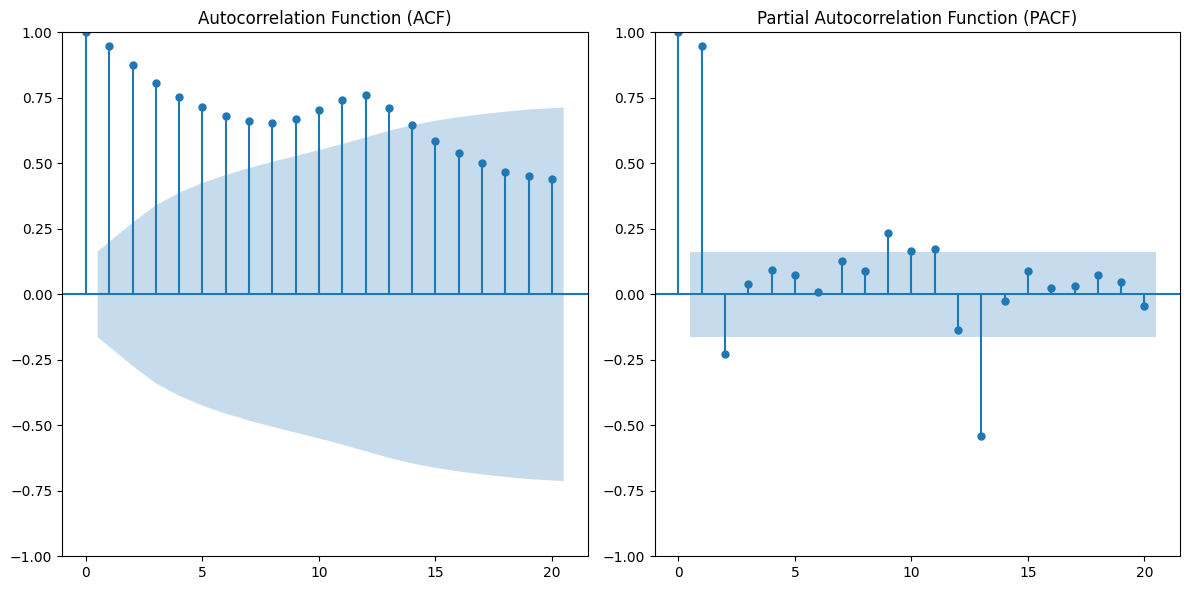

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

data = pd.read_csv("airline-passengers.csv")
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

acf = sm.tsa.acf(data, nlags=20)
pacf = sm.tsa.pacf(data, nlags=20)

data_diff = data.diff().dropna()
data_diff_forecast = data_diff.shift(-1).dropna()
data_diff = data_diff.iloc[:-1]

mae = mean_absolute_error(data_diff, data_diff_forecast)
mse = mean_squared_error(data_diff, data_diff_forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(data, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:             Passengers   No. Observations:                  144
Model:                     AutoReg(1)   Log Likelihood                -704.106
Method:               Conditional MLE   S.D. of innovations             33.277
Date:                Wed, 19 Jun 2024   AIC                           1414.212
Time:                        00:19:16   BIC                           1423.100
Sample:                    02-01-1949   HQIC                          1417.823
                         - 12-01-1960                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7055      7.084      1.935      0.053      -0.178      27.589
Passengers.L1     0.9589      0.023     41.106      0.000       0.913       1.005
                                    Root

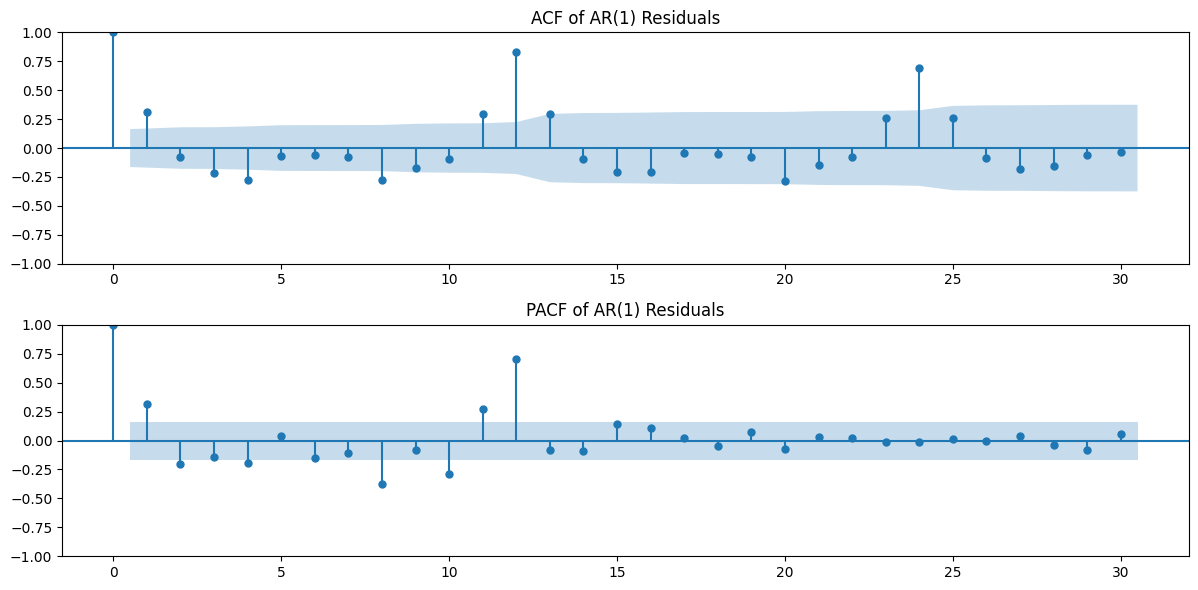

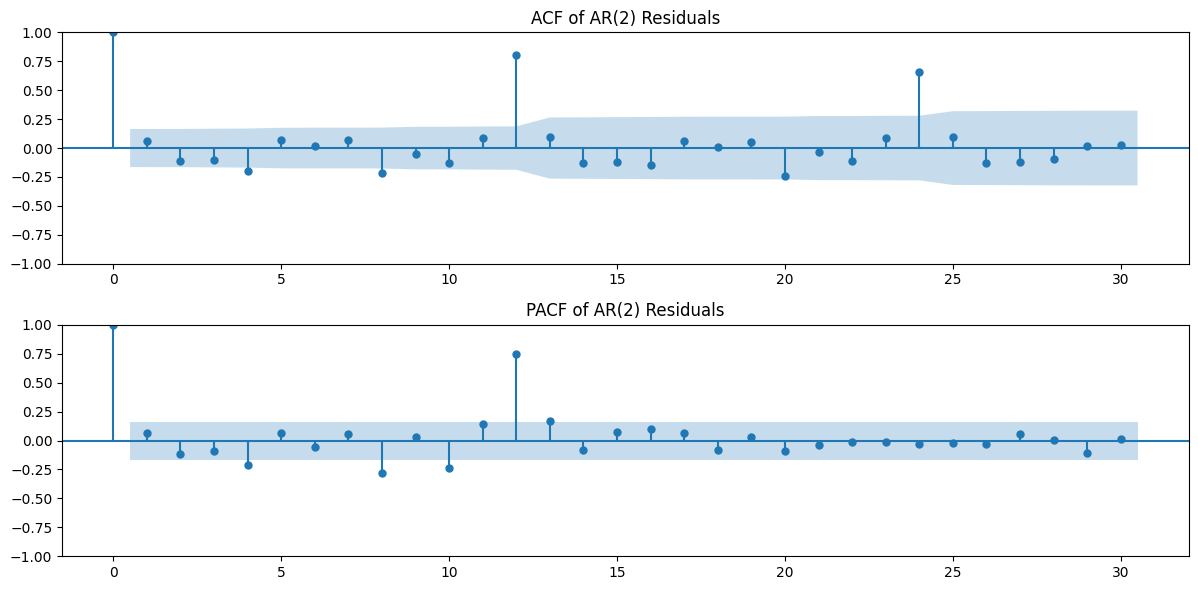

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

ar_model_1 = AutoReg(data, lags=1).fit()
ar_model_2 = AutoReg(data, lags=2).fit()

print(ar_model_1.summary())
print(ar_model_2.summary())

def print_ar_equation(ar_model_fit, model_order):
    ar_coeffs = ar_model_fit.params
    equation = f"y(t) = {ar_coeffs[0]:.4f}"
    for i in range(1, len(ar_coeffs)):
        equation += f" + {ar_coeffs[i]:.4f}*y(t-{i})"
    print(f"\nAR({model_order}) Equation:")
    print(equation)

print_ar_equation(ar_model_1, 1)
print_ar_equation(ar_model_2, 2)

def calculate_metrics(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

forecast_1 = ar_model_1.fittedvalues
mae_1, mse_1, rmse_1 = calculate_metrics(forecast_1, data['Passengers'][1:])

forecast_2 = ar_model_2.fittedvalues
mae_2, mse_2, rmse_2 = calculate_metrics(forecast_2, data['Passengers'][2:])

print("\nAR(1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.4f}")

print("\nAR(2) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_2:.4f}")
print(f"Mean Squared Error (MSE): {mse_2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.4f}")

def plot_acf_pacf(residuals, model_order):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of AR({model_order}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of AR({model_order}) Residuals')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(ar_model_1.resid, 1)
plot_acf_pacf(ar_model_2.resid, 2)

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Wed, 19 Jun 2024   AIC                           1618.863
Time:                        00:28:35   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6501     11.649     24.092      0.000     257.818     303.482
ma.L1          0.9642      0.030     32.239      0.000       0.906       1.023
sigma2      4205.2140    586.727      7.167      0.0

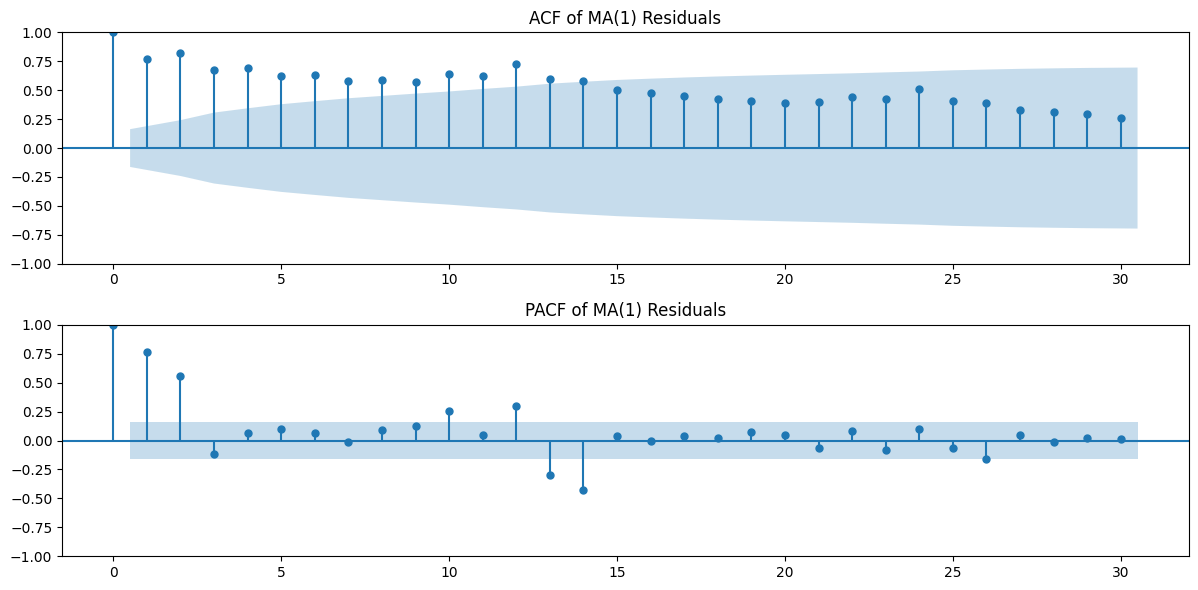


MA(2) Model Performance Metrics:
Mean Absolute Error (MAE): 38.2907
Mean Squared Error (MSE): 2275.9220
Root Mean Squared Error (RMSE): 47.7066
R-squared (R2): 0.8408


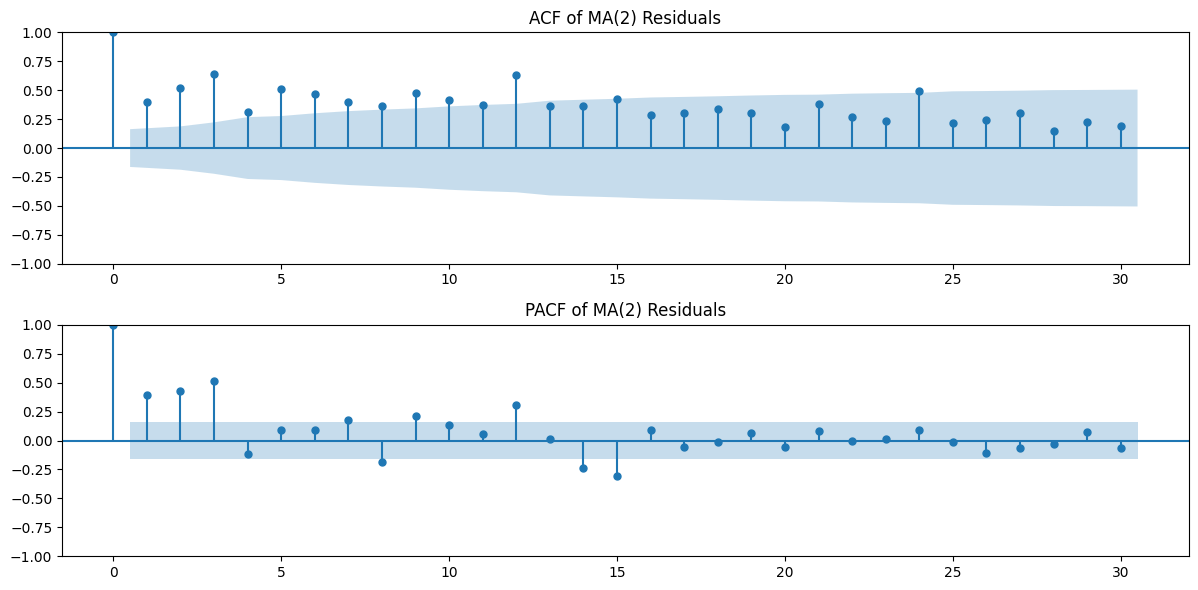

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

def evaluate_and_plot(ma_model_fit, lag):
    forecast = ma_model_fit.fittedvalues
    residuals = data['Passengers'] - forecast
    mae = mean_absolute_error(data['Passengers'], forecast)
    mse = mean_squared_error(data['Passengers'], forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(data['Passengers'], forecast)

    print(f"\nMA({lag}) Model Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R2): {r2:.4f}")

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of MA({lag}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of MA({lag}) Residuals')
    plt.tight_layout()
    plt.show()

ma_model_1 = ARIMA(data, order=(0, 0, 1))
ma_model_fit_1 = ma_model_1.fit()
print(ma_model_fit_1.summary())

ma_model_2 = ARIMA(data, order=(0, 0, 2))
ma_model_fit_2 = ma_model_2.fit()
print(ma_model_fit_2.summary())

ma_coeffs_2 = ma_model_fit_2.params
print("MA(2) Coefficients:")
print(ma_coeffs_2)

print("\nMA(2) Equation:")
equation_2 = f"y(t) = {ma_coeffs_2[0]:.4f}"
for i in range(1, len(ma_coeffs_2)):
    equation_2 += f" + {ma_coeffs_2[i]:.4f}*ε(t-{i})"
print(equation_2)

evaluate_and_plot(ma_model_fit_1, 1)

evaluate_and_plot(ma_model_fit_2, 2)


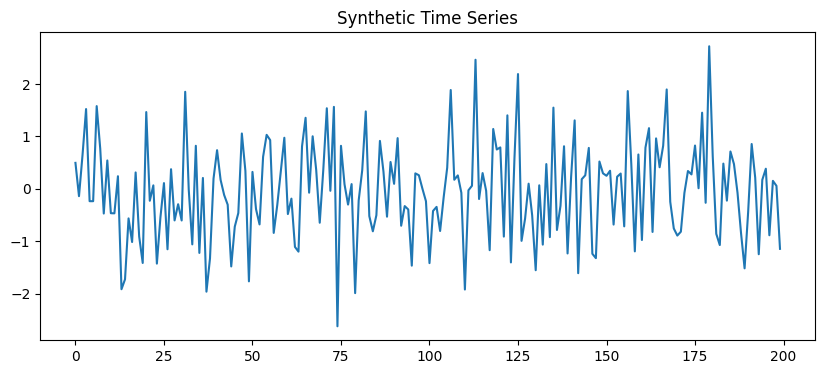

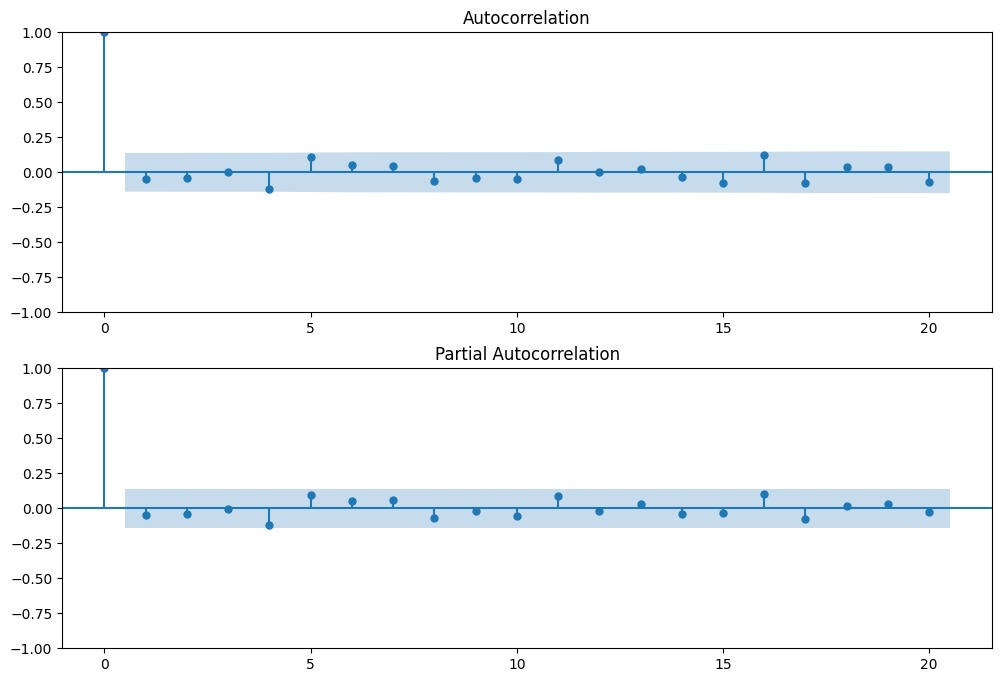

ARMA(1,1) Model Summary:
                                 SARIMAX Results                                 
Dep. Variable:     Synthetic Time Series   No. Observations:                  200
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -268.497
Date:                   Wed, 19 Jun 2024   AIC                            544.994
Time:                           00:31:37   BIC                            558.187
Sample:                                0   HQIC                           550.333
                                   - 200                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.058     -0.697      0.486      -0.155       0.074
ar.L1          0.4910      0.817      0.601      0.548      -1.110       2.092
ma.

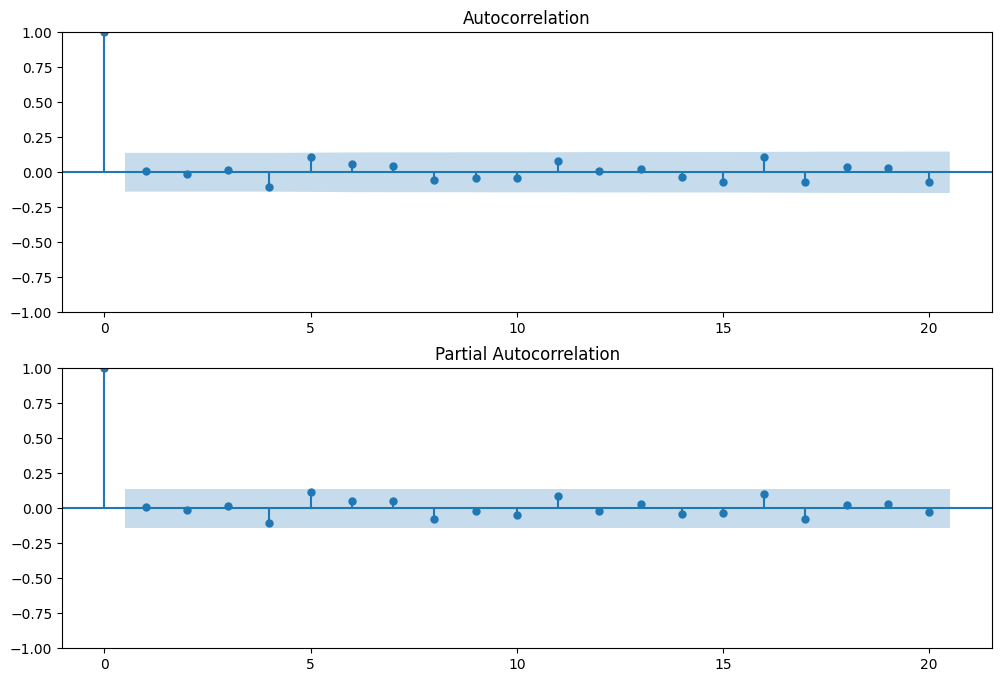

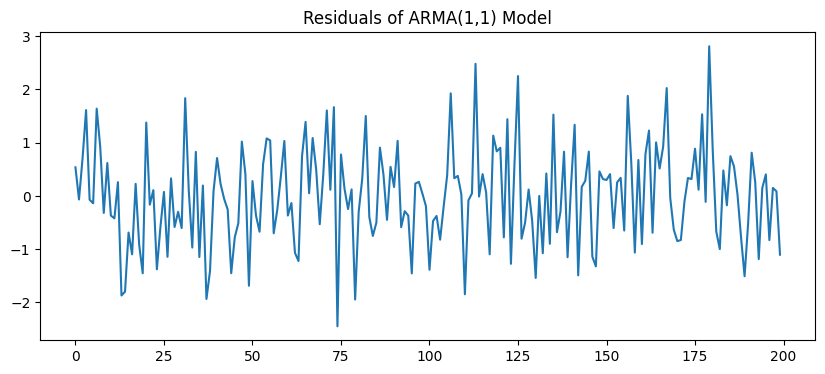

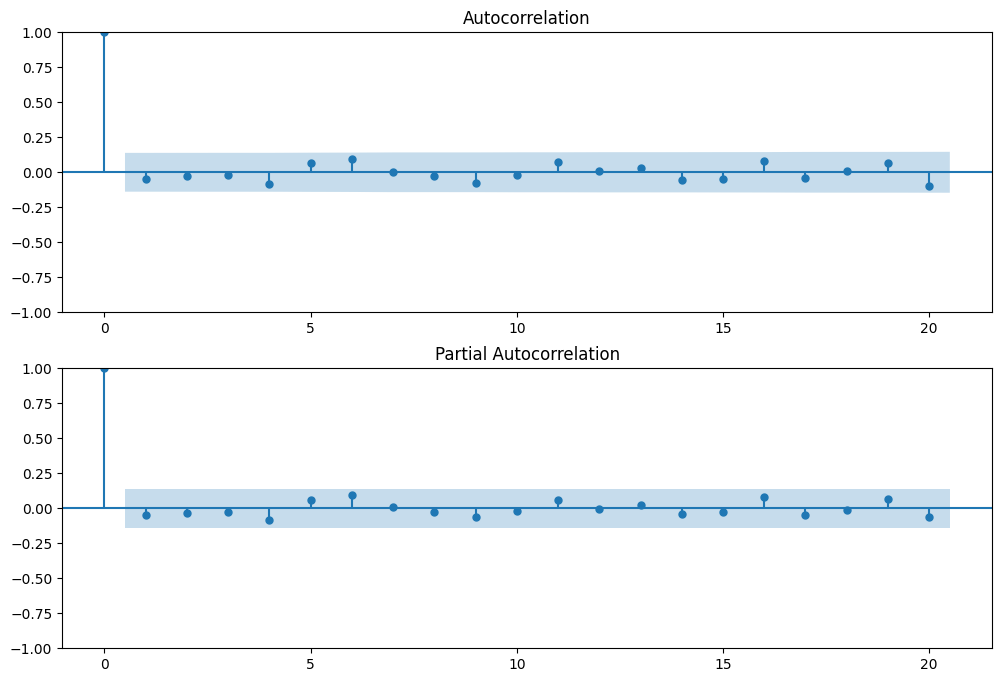

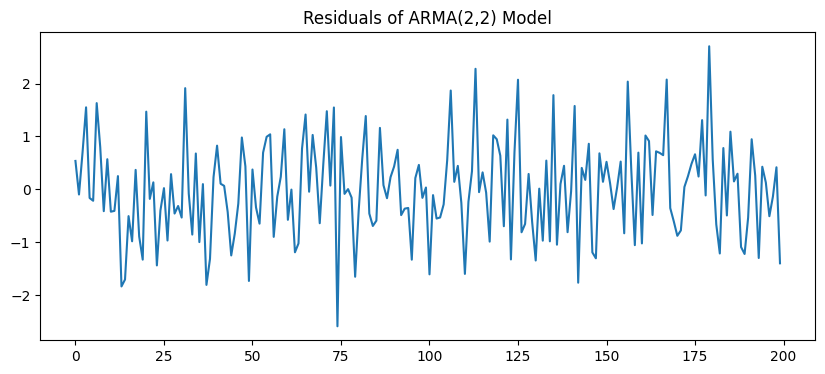

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating a synthetic time series dataset
n = 200  # Length of the time series
data = np.random.randn(n)

# Converting the dataset into a pandas Series
data_series = pd.Series(data, name="Synthetic Time Series")

# Plotting the synthetic time series
plt.figure(figsize=(10, 4))
plt.plot(data_series)
plt.title('Synthetic Time Series')
plt.show()

# Plotting ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(data_series, lags=20, ax=ax[0])
plot_pacf(data_series, lags=20, ax=ax[1])
plt.show()

# Fitting an ARMA(1,1) model
model_arma11 = ARIMA(data_series, order=(1, 0, 1))
fitted_arma11 = model_arma11.fit()
print("ARMA(1,1) Model Summary:")
print(fitted_arma11.summary())

# Fitting an ARMA(2,2) model
model_arma22 = ARIMA(data_series, order=(2, 0, 2))
fitted_arma22 = model_arma22.fit()
print("\nARMA(2,2) Model Summary:")
print(fitted_arma22.summary())

# Evaluating model performance using AIC and BIC
print("\nModel Performance:")
print(f"ARMA(1,1) AIC: {fitted_arma11.aic}, BIC: {fitted_arma11.bic}")
print(f"ARMA(2,2) AIC: {fitted_arma22.aic}, BIC: {fitted_arma22.bic}")

# Residual analysis for ARMA(1,1)
residuals_arma11 = fitted_arma11.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals_arma11, lags=20, ax=ax[0])
plot_pacf(residuals_arma11, lags=20, ax=ax[1])
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(residuals_arma11)
plt.title('Residuals of ARMA(1,1) Model')
plt.show()

# Residual analysis for ARMA(2,2)
residuals_arma22 = fitted_arma22.resid
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(residuals_arma22, lags=20, ax=ax[0])
plot_pacf(residuals_arma22, lags=20, ax=ax[1])
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(residuals_arma22)
plt.title('Residuals of ARMA(2,2) Model')
plt.show()

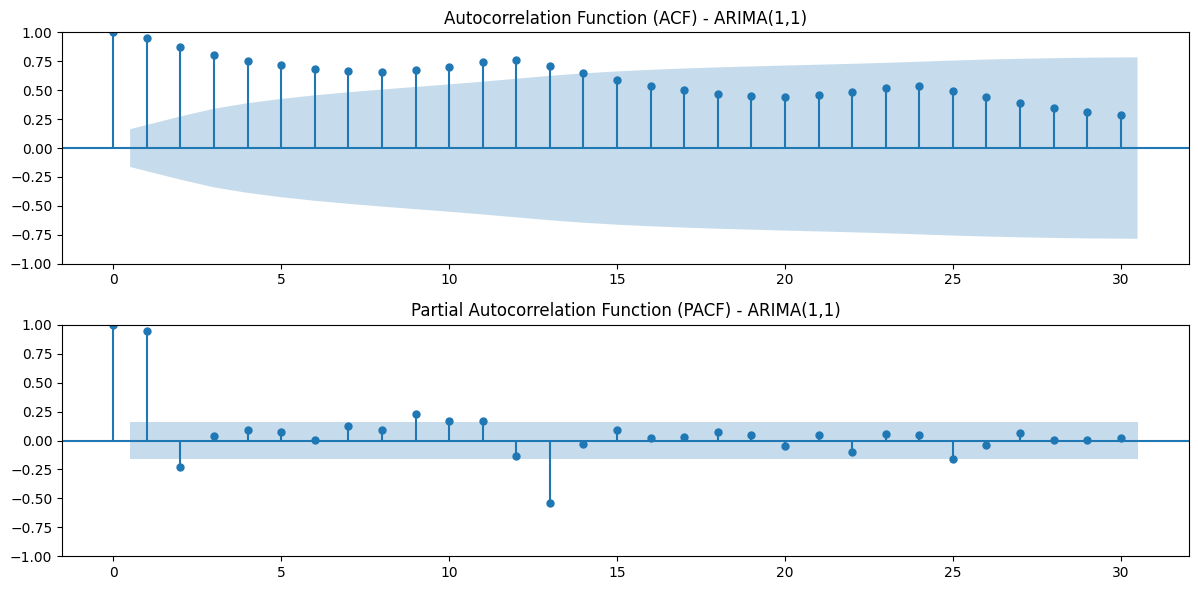

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -698.926
Date:                Wed, 19 Jun 2024   AIC                           1401.852
Time:                        00:33:04   BIC                           1407.778
Sample:                    01-01-1949   HQIC                          1404.260
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3066      0.080      3.849      0.000       0.150       0.463
sigma2      1029.2429    103.738      9.922      0.000     825.920    1232.566
Ljung-Box (L1) (Q):                   0.66   Jarque-

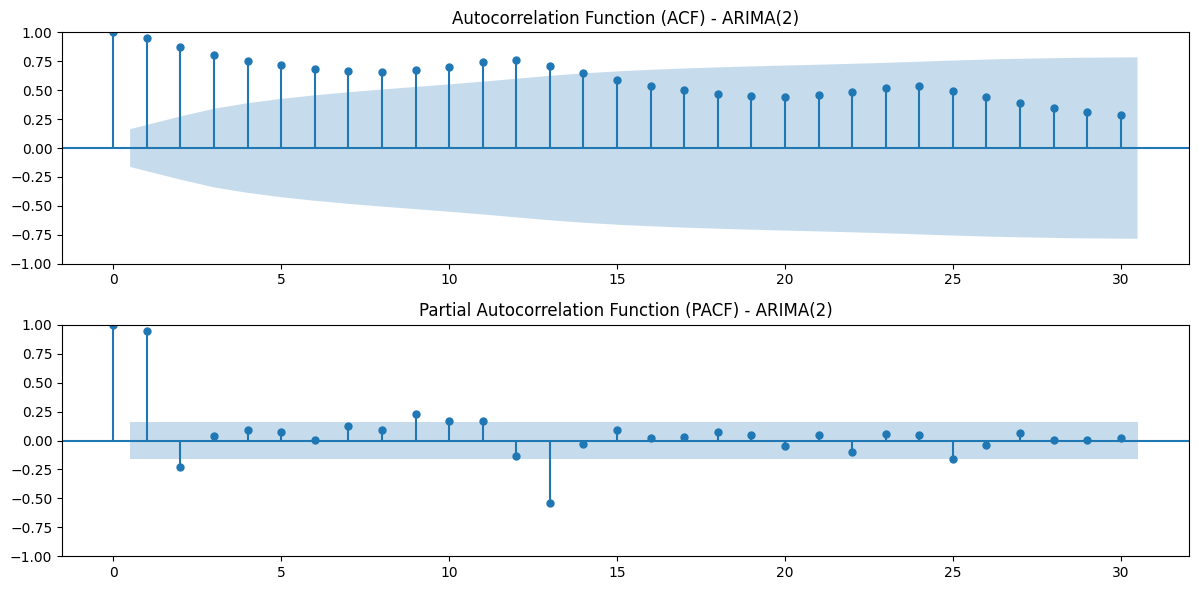

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -702.819
Date:                Wed, 19 Jun 2024   AIC                           1413.639
Time:                        00:33:05   BIC                           1425.518
Sample:                    01-01-1949   HQIC                          1418.466
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2991     54.518      5.141      0.000     173.445     387.153
ar.L1          1.2831      0.079     16.316      0.000       1.129       1.437
ar.L2         -0.3322      0.082     -4.054      0.0

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load and preprocess the data (replace 'airline-passengers.csv' with your dataset)
data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot ACF and PACF plots for ARIMA(1,1)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data, lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF) - ARIMA(1,1)')
plt.subplot(2, 1, 2)
plot_pacf(data, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) - ARIMA(1,1)')
plt.tight_layout()
plt.show()

# Fit ARIMA(1,1) model
arima11_model = ARIMA(data, order=(1, 1, 0))
arima11_model_fit = arima11_model.fit()

# Print model summary for ARIMA(1,1)
print(arima11_model_fit.summary())

# Get ARIMA(1,1) model coefficients
arima11_coefficients = arima11_model_fit.params

# Print ARIMA(1,1) model equation
print("\nARIMA(1,1) Model Equation:")
print("Y(t) = ", end="")
for i in range(len(arima11_coefficients)):
    if i == 0:
        print(f"{arima11_coefficients[i]:.4f}", end="")
    else:
        print(f" + {arima11_coefficients[i]:.4f} * ΔY(t-{i}) ", end="")
print()

# Calculate and print performance metrics for ARIMA(1,1)
arima11_forecast = arima11_model_fit.fittedvalues
arima11_mae = mean_absolute_error(data['Passengers'], arima11_forecast)
arima11_mse = mean_squared_error(data['Passengers'], arima11_forecast)
arima11_rmse = np.sqrt(arima11_mse)

print(f"\nARIMA(1,1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {arima11_mae:.4f}")
print(f"Mean Squared Error (MSE): {arima11_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {arima11_rmse:.4f}")

# Plot ACF and PACF plots for ARIMA(2)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data, lags=30, ax=plt.gca(), title='Autocorrelation Function (ACF) - ARIMA(2)')
plt.subplot(2, 1, 2)
plot_pacf(data, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function (PACF) - ARIMA(2)')
plt.tight_layout()
plt.show()

# Fit ARIMA(2) model
arima2_model = ARIMA(data, order=(2, 0, 0))
arima2_model_fit = arima2_model.fit()

# Print model summary for ARIMA(2)
print(arima2_model_fit.summary())

# Get ARIMA(2) model coefficients
arima2_coefficients = arima2_model_fit.params

# Print ARIMA(2) model equation
print("\nARIMA(2) Model Equation:")
print("Y(t) = ", end="")
for i in range(len(arima2_coefficients)):
    if i == 0:
        print(f"{arima2_coefficients[i]:.4f}", end="")
    else:
        print(f" + {arima2_coefficients[i]:.4f} * Y(t-{i}) ", end="")
print()

# Calculate and print performance metrics for ARIMA(2)
arima2_forecast = arima2_model_fit.fittedvalues
arima2_mae = mean_absolute_error(data['Passengers'], arima2_forecast)
arima2_mse = mean_squared_error(data['Passengers'], arima2_forecast)
arima2_rmse = np.sqrt(arima2_mse)

print(f"\nARIMA(2) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {arima2_mae:.4f}")
print(f"Mean Squared Error (MSE): {arima2_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {arima2_rmse:.4f}")


Defaulting to user installation because normal site-packages is not writeable


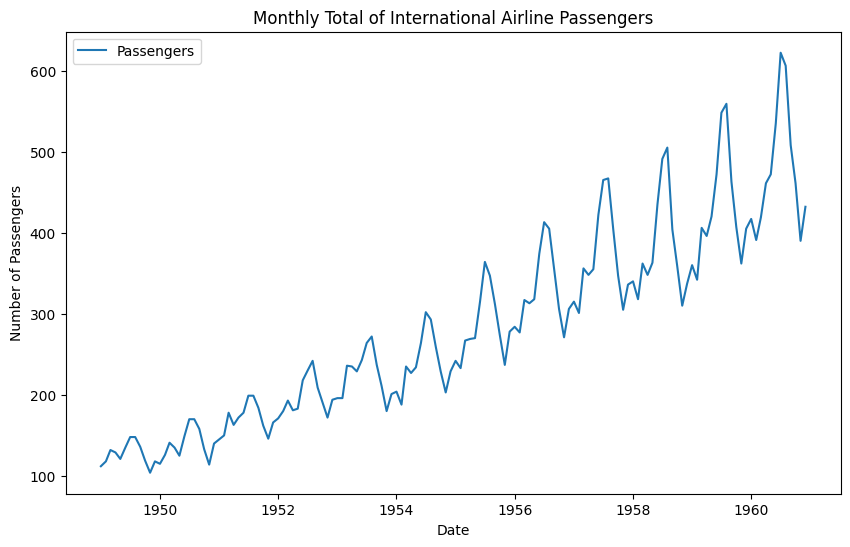

ARCH(1) Model Summary:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                117.782
Distribution:                  Normal   AIC:                          -229.565
Method:            Maximum Likelihood   BIC:                          -220.676
                                        No. Observations:                  143
Date:                Wed, Jun 19 2024   Df Residuals:                      142
Time:                        00:36:17   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.4398e-03  2.459e-02

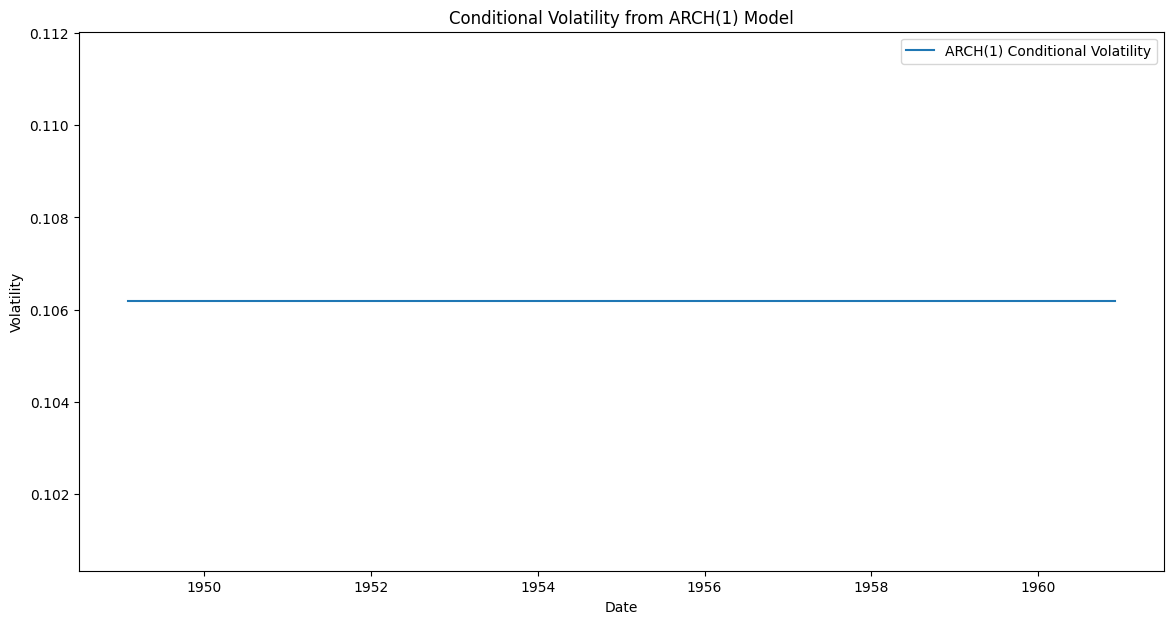

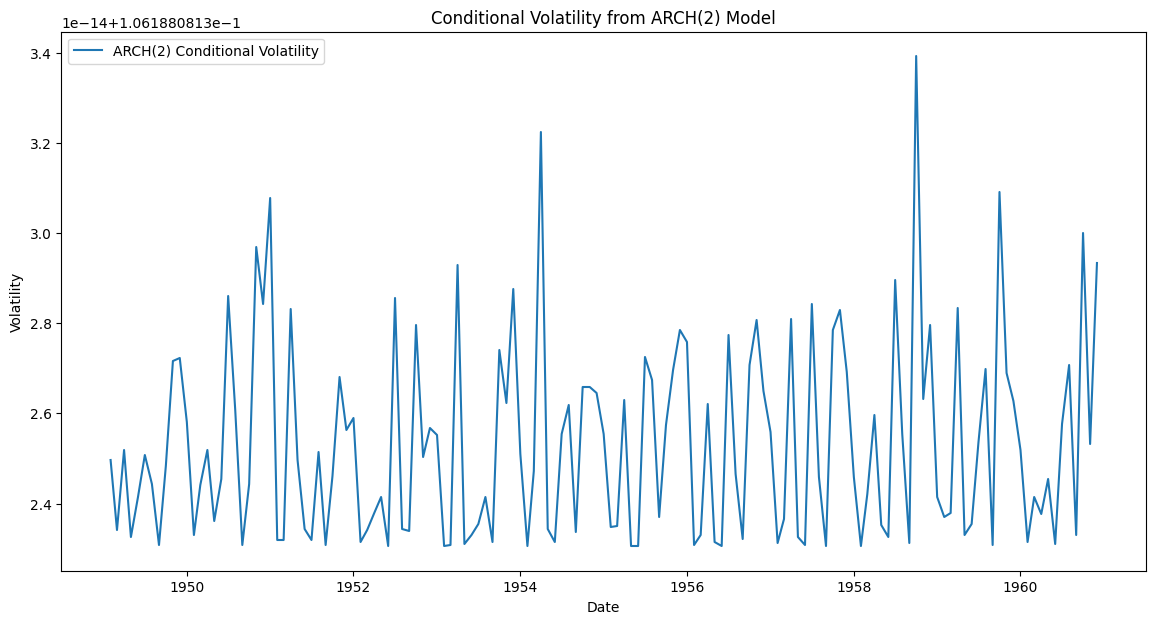

<Figure size 1400x700 with 0 Axes>

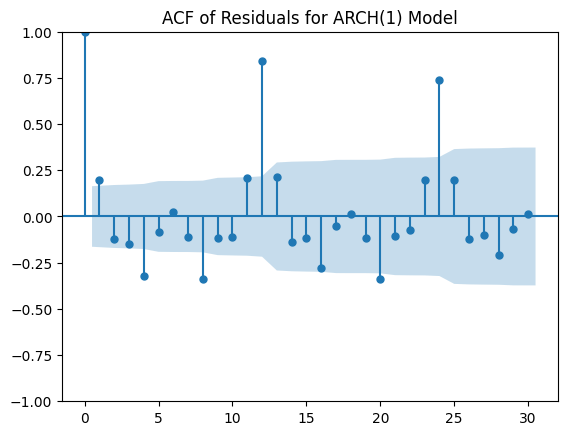

<Figure size 1400x700 with 0 Axes>

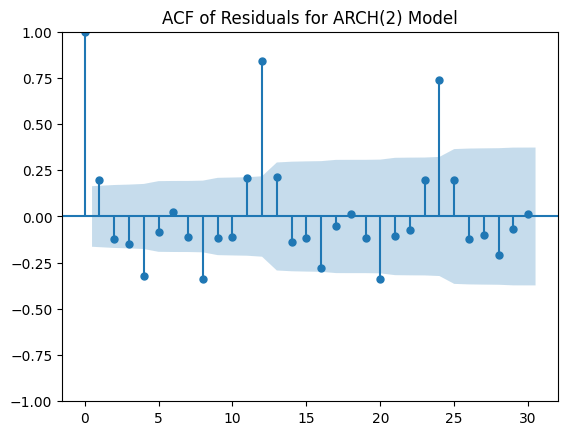

Evaluation Metrics for ARCH(1): MAE=0.115808, MSE=0.020634, RMSE=0.143646
Evaluation Metrics for ARCH(2): MAE=0.115810, MSE=0.020635, RMSE=0.143649


In [20]:
# Install the required libraries

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

# Plot the data to visualize
plt.figure(figsize=(10, 6))
plt.plot(data, label='Passengers')
plt.title('Monthly Total of International Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Compute the log returns
data['Log_Returns'] = np.log(data['Passengers']).diff()
returns = data['Log_Returns'].dropna()

# Fit ARCH(1) model
arch_model_1 = arch_model(returns, vol='ARCH', p=1)
arch_fit_1 = arch_model_1.fit(disp='off')

# Fit ARCH(2) model
arch_model_2 = arch_model(returns, vol='ARCH', p=2)
arch_fit_2 = arch_model_2.fit(disp='off')

# Print the model summaries
print("ARCH(1) Model Summary:")
print(arch_fit_1.summary())
print("\nARCH(2) Model Summary:")
print(arch_fit_2.summary())

# Extract the coefficients
params_1 = arch_fit_1.params
params_2 = arch_fit_2.params

# Model equations
arch1_equation = f"σ_t^2 = {params_1['omega']:.6f} + {params_1['alpha[1]']:.6f} * ε_(t-1)^2"
arch2_equation = f"σ_t^2 = {params_2['omega']:.6f} + {params_2['alpha[1]']:.6f} * ε_(t-1)^2 + {params_2['alpha[2]']:.6f} * ε_(t-2)^2"

print(f"ARCH(1) Model Equation: {arch1_equation}")
print(f"ARCH(2) Model Equation: {arch2_equation}")

# Plot the conditional volatility for ARCH(1) model
plt.figure(figsize=(14, 7))
plt.plot(arch_fit_1.conditional_volatility, label='ARCH(1) Conditional Volatility')
plt.title('Conditional Volatility from ARCH(1) Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Plot the conditional volatility for ARCH(2) model
plt.figure(figsize=(14, 7))
plt.plot(arch_fit_2.conditional_volatility, label='ARCH(2) Conditional Volatility')
plt.title('Conditional Volatility from ARCH(2) Model')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Plot ACF of the residuals for ARCH(1) model
plt.figure(figsize=(14, 7))
plot_acf(arch_fit_1.resid, lags=30)
plt.title('ACF of Residuals for ARCH(1) Model')
plt.show()

# Plot ACF of the residuals for ARCH(2) model
plt.figure(figsize=(14, 7))
plot_acf(arch_fit_2.resid, lags=30)
plt.title('ACF of Residuals for ARCH(2) Model')
plt.show()

# Calculate evaluation metrics
def calculate_metrics(fit):
    # Calculate MAE
    mae = mean_absolute_error(returns, fit.conditional_volatility)
    # Calculate MSE
    mse = mean_squared_error(returns, fit.conditional_volatility)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# Metrics for ARCH(1)
mae_1, mse_1, rmse_1 = calculate_metrics(arch_fit_1)
# Metrics for ARCH(2)
mae_2, mse_2, rmse_2 = calculate_metrics(arch_fit_2)

print(f"Evaluation Metrics for ARCH(1): MAE={mae_1:.6f}, MSE={mse_1:.6f}, RMSE={rmse_1:.6f}")
print(f"Evaluation Metrics for ARCH(2): MAE={mae_2:.6f}, MSE={mse_2:.6f}, RMSE={rmse_2:.6f}")


                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Passengers   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -840.534
Distribution:                  Normal   AIC:                           1689.07
Method:            Maximum Likelihood   BIC:                           1700.95
                                        No. Observations:                  144
Date:                Wed, Jun 19 2024   Df Residuals:                      143
Time:                        00:35:33   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu           202.4010      9.037     22.398 4.140e-111 [1.

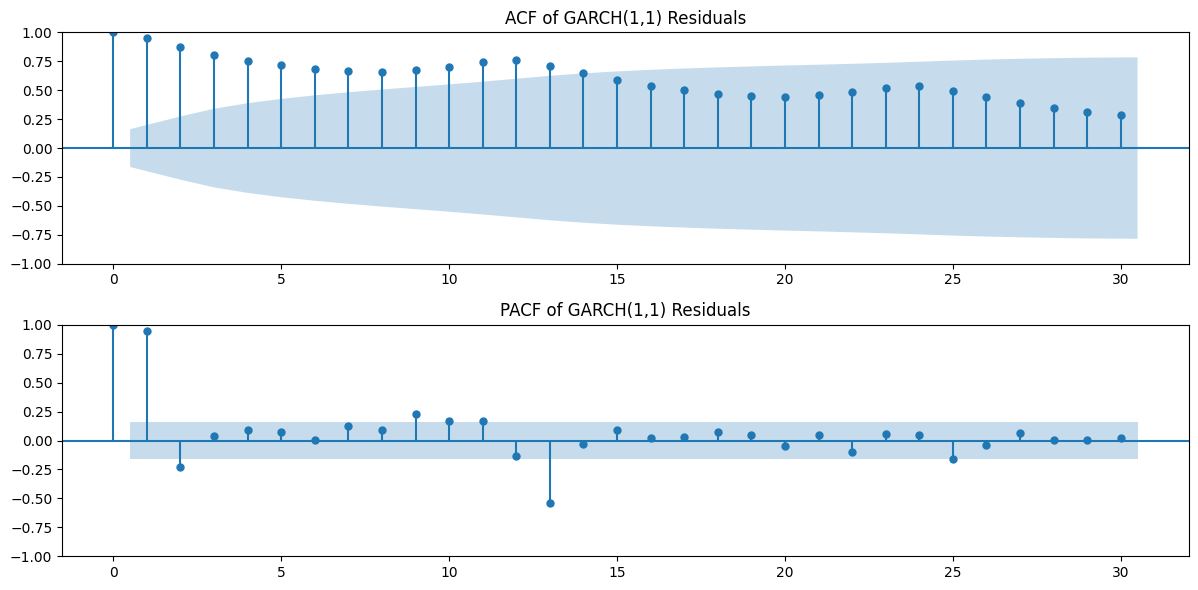

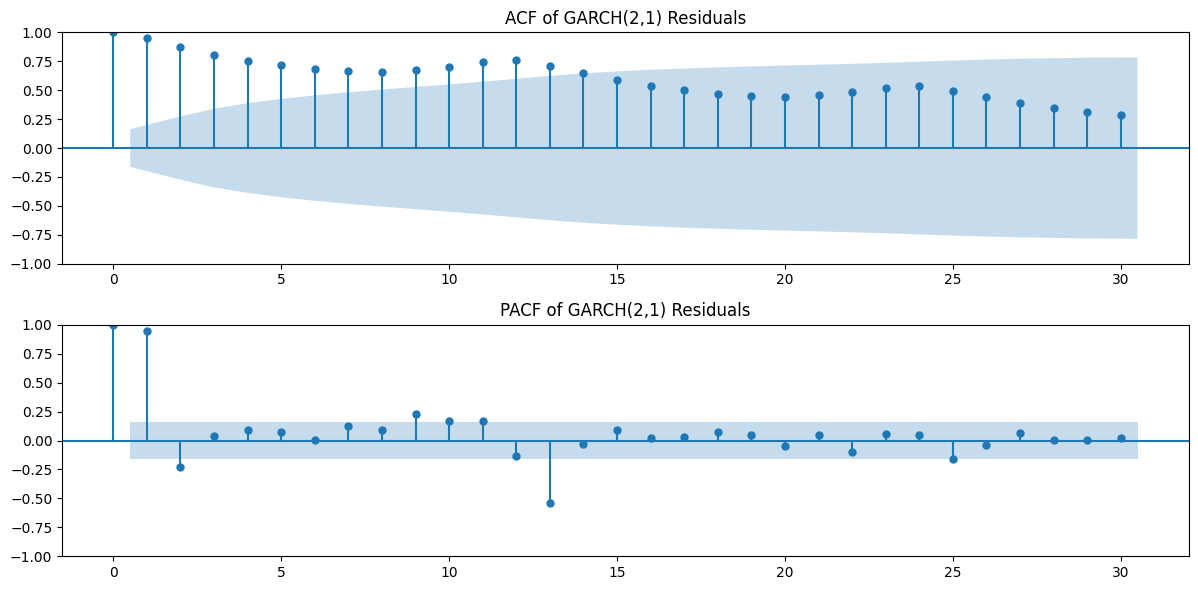

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('airline-passengers.csv')
data.columns = ['Month', 'Passengers']
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

garch_model_1_1 = arch_model(data['Passengers'], vol='Garch', p=1, q=1).fit(disp='off')
garch_model_2_1 = arch_model(data['Passengers'], vol='Garch', p=2, q=1).fit(disp='off')

print(garch_model_1_1.summary())
print(garch_model_2_1.summary())

def print_garch_equation(garch_model_fit, model_order):
    params = garch_model_fit.params
    p, q = model_order
    equation = f"\sigma^2(t) = {params['omega']:.4f}"
    for i in range(1, p + 1):
        equation += f" + {params[f'alpha[{i}]']:.4f}*ε(t-{i})^2"
    for j in range(1, q + 1):
        equation += f" + {params[f'beta[{j}]']:.4f}*σ^2(t-{j})"
    print(f"\nGARCH({p}, {q}) Equation:")
    print(equation)

print_garch_equation(garch_model_1_1, (1, 1))
print_garch_equation(garch_model_2_1, (2, 1))

def calculate_metrics(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

forecast_1_1 = garch_model_1_1.conditional_volatility
mae_1_1, mse_1_1, rmse_1_1 = calculate_metrics(forecast_1_1, data['Passengers'])

forecast_2_1 = garch_model_2_1.conditional_volatility
mae_2_1, mse_2_1, rmse_2_1 = calculate_metrics(forecast_2_1, data['Passengers'])

print("\nGARCH(1,1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_1_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_1_1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1_1:.4f}")

print("\nGARCH(2,1) Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae_2_1:.4f}")
print(f"Mean Squared Error (MSE): {mse_2_1:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2_1:.4f}")

def plot_acf_pacf(residuals, model_order):
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plot_acf(residuals, lags=30, ax=plt.gca(), title=f'ACF of GARCH({model_order[0]},{model_order[1]}) Residuals')
    plt.subplot(2, 1, 2)
    plot_pacf(residuals, lags=30, ax=plt.gca(), title=f'PACF of GARCH({model_order[0]},{model_order[1]}) Residuals')
    plt.tight_layout()
    plt.show()

plot_acf_pacf(garch_model_1_1.resid, (1, 1))
plot_acf_pacf(garch_model_2_1.resid, (2, 1))